In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [ ]:
import pandas as pd
dt = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target, columns=['target'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dt, y, test_size=0.2)

In [ ]:
def model(x, m, c):
  """Calculates the predicted target value for a simple linear regression model.

  Args:
    x: The input feature value.
    m: The slope of the model.
    c: The intercept of the model.

  Returns:
    The predicted target value.
  """
  return m * x + c

def cost(y_actual, y_predicted):
  """Calculates the Mean Squared Error (MSE) cost.

  Args:
    y_actual: The actual target values.
    y_predicted: The predicted target values.

  Returns:
    The Mean Squared Error.
  """
  return ((y_actual - y_predicted) ** 2).mean()


  # Define the function to calculate the derivatives of the cost
def derivatives(x, y, yh):
  """
  Calculates the partial derivatives of the cost function w.r.t. m and c.
  Inputs x, y, yh are pandas Series.
  Returns a dictionary with the derivatives.
  """
  n = len(y)
  dm = (-2/n) * (x * (y - yh)).sum()
  dc = (-2/n) * (y - yh).sum()
  return {'m': dm, 'c': dc}


In [ ]:
learningrate = 0.1
m = []
c = []
J = []
m.append(0)
c.append(0)
J.append(cost(y_train['target'], X_train['bmi'].apply(lambda x: model(x, m[-1], c[-1]))))

In [ ]:
J_min = 0.01
del_J_min = 0.0001
max_iter = 10000

In [ ]:
import sys
print('.', end='')
sys.stdout.flush()

.

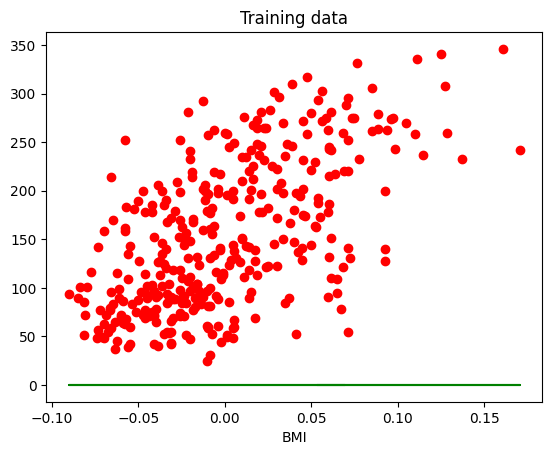


Algorithm terminated with
  1 iterations,
  m 0
  c 0
  training cost 29484.475920679888
  testing cost 27448.325842696628


Text(0.5, 1.0, 'Testing data')

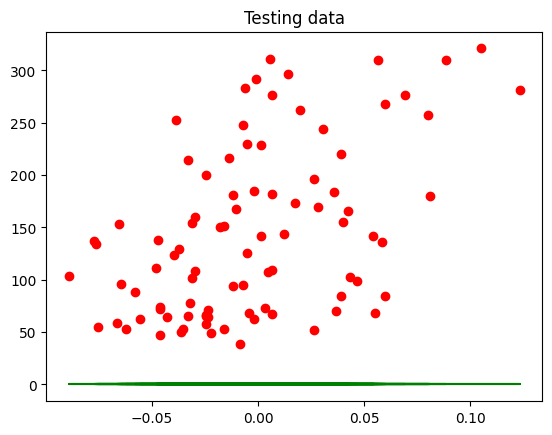

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train['bmi'], y_train['target'], color='red')
plt.title('Training data')
plt.xlabel('BMI')
line = None

if line:
  line[0].remove()
line = plt.plot(X_train['bmi'], X_train['bmi'].apply(lambda x: model(x, m[-1], c[-1])), '-', color='green')
plt.pause(0.001)

y_train_pred = X_train['bmi'].apply(lambda x: model(x, m[-1], c[-1]))
y_test_pred = X_test['bmi'].apply(lambda x: model(x, m[-1], c[-1]))
print('\nAlgorithm terminated with')
print(f'  {len(J)} iterations,')
print(f'  m {m[-1]}')
print(f'  c {c[-1]}')
print(f'  training cost {J[-1]}')
testcost = cost(y_test['target'], y_test_pred)
print(f'  testing cost {testcost}')
plt.figure()
plt.scatter(X_test['bmi'], y_test['target'], color='red')
plt.plot(X_test['bmi'], \
         X_test['bmi'].apply(lambda x: model(x, m[-1], c[-1])), \
         '-', color='green')
plt.title('Testing data')

sklearn
  m [957.19522874]
  c 153.23802690008867
  training cost: 3635.6530035645046
  testing cost: 4907.817574196121


Text(0.5, 0, 'BMI')

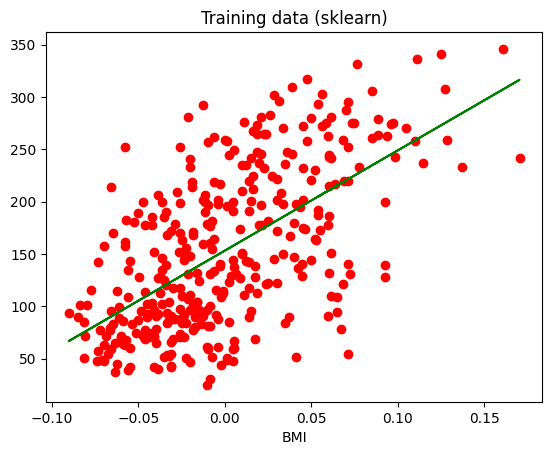

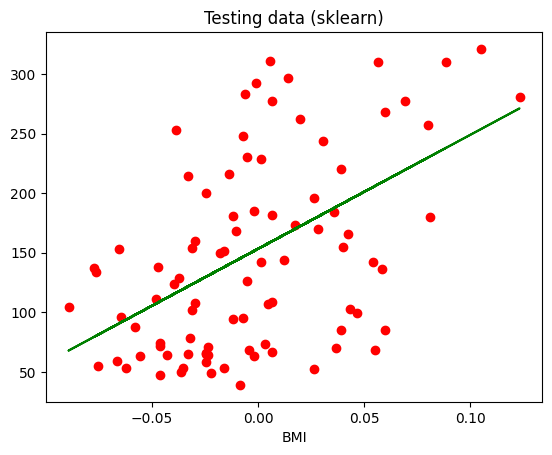

In [ ]:
from sklearn import linear_model
regrmodel = linear_model.LinearRegression()
regrmodel.fit(X_train[['bmi']], y_train['target'])
y_train_pred = regrmodel.predict(X_train[['bmi']])
y_test_pred = regrmodel.predict(X_test[['bmi']])
y_train_pred = pd.Series(y_train_pred)
y_train_pred.index = y_train.index

y_test_pred = pd.Series(y_test_pred)
y_test_pred.index = y_test.index
print('sklearn')
print(f'  m {regrmodel.coef_}')
print(f'  c {regrmodel.intercept_}')
traincost = cost(y_train['target'], y_train_pred)
testcost = cost(y_test['target'], y_test_pred)
print(f'  training cost: {traincost}')
print(f'  testing cost: {testcost}')
plt.figure()
plt.scatter(X_train['bmi'], y_train['target'], color='red')
plt.plot(X_train['bmi'], y_train_pred, '-', color='green')
plt.title('Training data (sklearn)')
plt.xlabel('BMI')

plt.figure()
plt.scatter(X_test['bmi'], y_test['target'], color='red')
plt.plot(X_test['bmi'], y_test_pred, '-', color='green')
plt.title('Testing data (sklearn)')
plt.xlabel('BMI')

Text(0.5, 0.92, 'Testing data (sklearn multivariate)')

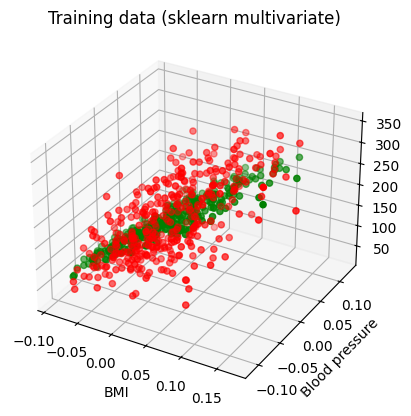

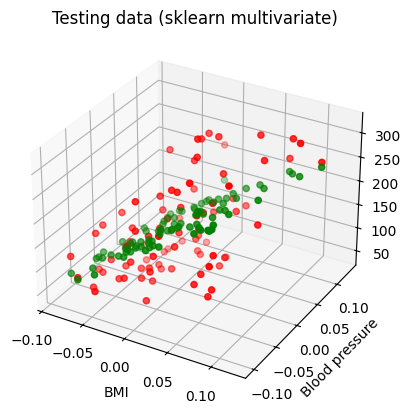

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['bmi'], X_train['bp'], y_train['target'], color='red')
ax.scatter(X_train['bmi'], X_train['bp'], y_train_pred, color='green')
ax.set_xlabel('BMI')
ax.set_ylabel('Blood pressure')
ax.set_title('Training data (sklearn multivariate)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['bmi'], X_test['bp'], y_test['target'], color='red')
ax.scatter(X_test['bmi'], X_test['bp'], y_test_pred, color='green')
ax.set_xlabel('BMI')
ax.set_ylabel('Blood pressure')
ax.set_title('Testing data (sklearn multivariate)')